## Setting up environment and loading data

In [1]:
#Setting up environment
import pandas as pd
import os
import numpy as np
from IPython.display import Math
 
import matplotlib.pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#Uploading data
test_data_raw = pd.read_csv("/Projects/CodeFurther/titanic_prediction/data/raw/test.csv", index_col=[0])
train_data_raw = pd.read_csv("/Projects/CodeFurther/titanic_prediction/data/raw/train.csv", index_col=[0])

In [19]:
train_data_raw.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [60]:
train_data_nonan_raw = train_data_raw[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].dropna(axis=0)
train_data_nonan_raw.size

5696

## Visualisation
Based on https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e


In [20]:
# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [61]:
train_data_raw['Age'].iplot(kind='hist', xTitle='Age of passengers',
                  yTitle='Count', title='Passenger Age Distribution')

In [62]:
train_data_nonan_raw.pivot(columns='Pclass', values='Age').iplot(
        kind='box',
        yTitle='Age',
        title='Age distribution by class')

In [63]:
train_data_raw.pivot(columns='Survived', values='Fare').iplot(
        kind='box',
        yTitle='Age',
        title='Age distribution by class')

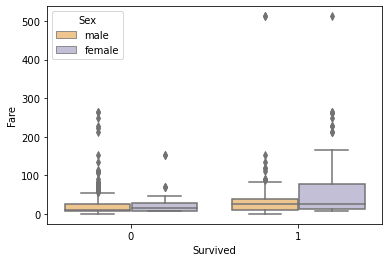

In [64]:
sns.boxplot(y = 'Fare',x='Survived',data = train_data_raw,hue='Sex',palette="PuOr")

In [65]:
import plotly.figure_factory as ff
figure = ff.create_scatterplotmatrix(
    train_data_nonan_raw[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']],
    diag='histogram',
    index='Survived')
figure.update_layout(
    width=1000,
    height=1000,
)
figure.show()

In [68]:
corrs = train_data_nonan_raw.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)

figure.update_layout(
    width=1000,
    height=1000,
)
figure.show()